In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from alphastable import *

In [5]:
import os

In [6]:
os.system('ls')

1

simulate


In [18]:
sigma = 1
d = 2
N = 100
alpha = 1.8
beta = 1
gamma = np.cos((np.pi * alpha) / 4) ** (2/alpha)
delta = 0
G = np.random.normal(0, sigma, size=[N, d])
A = alphastable(N, 1, alpha/2, beta, gamma, delta, 1)
X = np.sqrt(A) * G


estimate the characteristic function


In [28]:
T = np.arange(-3, 3 + 0.01, 0.01)
Re = np.ones((len(T), len(T)))
Im = np.ones((len(T), len(T)))
for i in range(len(T)):
    for j in range(len(T)):
        Re[i, j] = np.sum(np.cos(T[i] * X[:, 0] + T[j] * X[:, 1]))
        Im[i, j] = np.sum(np.sin(T[i] * X[:, 0] + T[j] * X[:, 1]))
Re_MC = Re / len(X)
Im_MC = Im /len(X)



In [9]:
tmpT = []
for i in range(len(T)):
    for j in range(len(T)):
        tmpT.append([T[i], T[j]])

tmpT = np.array(tmpT)
tmpX = np.repeat(X) #!sprawdzić ile razy
Re = np.zeros((len(T)**2))
Im = np.zeros((len(T)**2))

for k in range(len(X)):
    tmp = sum(tmpT*X)
    Re += np.cos(sum)
    Im += np.sin(T[i] * X[k, 0] + T[j] * X[k, 1])
    #! domyśleć i dokończyć

TypeError: _repeat_dispatcher() missing 1 required positional argument: 'repeats'

In [29]:

def characterist_fun_task2(theta, alpha, sigma):
    '''
    theta powinna byc listą list punktów,
    dla których liczona jest funkcja charakterystyczna,
    lub odpowiednią macierza.
    '''
    def myAbs(theta):
        if theta.shape == 1:
            return abs(theta)
        return np.sqrt(np.sum(theta ** 2, 1))

    theta = np.array(theta)
    # beta = 1
    # gamma = np.cos(np.pi * alpha / 4) ** (2 / alpha)
    # delta = 0
    return np.exp(-(2 ** (-alpha/2)) * (sigma ** alpha) * (myAbs(theta) ** alpha))

def characterist_fun_meshgrid(theta, alpha, sigma):
    '''
    theta powinna byc listą par punktow w kolejnych wymiarach,
    lub odpowiednią macierza.
    '''
    theta = np.array(theta)
    tet = []
    for i in range(len(theta[0])):
        for j in range(len(theta[1])):
            tet.append([theta[0][i], theta[1][j]])
    tet = characterist_fun_task2(tet, alpha, sigma)
    return tet.reshape(len(theta[0]), len(theta[1]))

    

In [30]:
np.shape(Re_MC)

(601, 601)

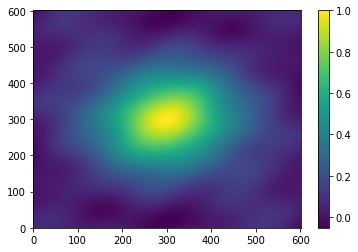

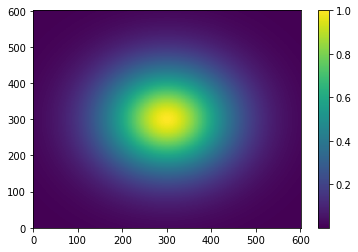

In [31]:
plt.figure(1)
plt.pcolormesh(Re_MC)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(characterist_fun_meshgrid([T,T], alpha, sigma))
plt.colorbar()


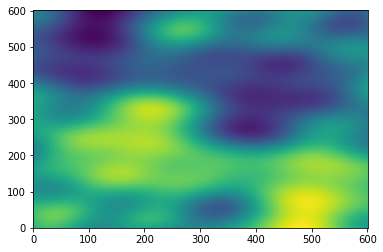

In [32]:
plt.pcolormesh(Im_MC)